In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [5]:
df = pd.read_csv("/content/advertising_and_sales_clean.csv")

df.head()


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [6]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [8]:
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()


In [10]:
df["Total_Spend"] = df["tv"] + df["radio"] + df["social_media"]
df["ROI"] = (df["sales"] - df["Total_Spend"]) / df["Total_Spend"]
df.head()


,tv,radio,social_media,influencer,sales,Total_Spend,ROI
0,16000.0,6566.23,2907.98,Mega,54732.76,25474.21,1.148556
1,13000.0,9237.76,2409.57,Mega,46677.90,24647.33,0.893832
2,41000.0,15886.45,2913.41,Mega,150177.83,59799.86,1.511341
3,83000.0,30020.03,6922.30,Mega,298246.34,119942.33,1.486581
4,15000.0,8437.41,1406.00,Micro,56594.18,24843.41,1.278036


In [11]:
total_spend = df["Total_Spend"].sum()
total_sales = df["sales"].sum()
overall_roi = (total_sales - total_spend) / total_spend

total_spend, total_sales, overall_roi


(np.float64(343422653.0),
 np.float64(874711007.78),
 np.float64(1.547039340995365))

In [12]:
channel_spend = df[["tv", "radio", "social_media", "sales"]].mean()
channel_spend


,0
tv,54062.912451
radio,18157.533110
social_media,3323.472829
sales,192413.332112


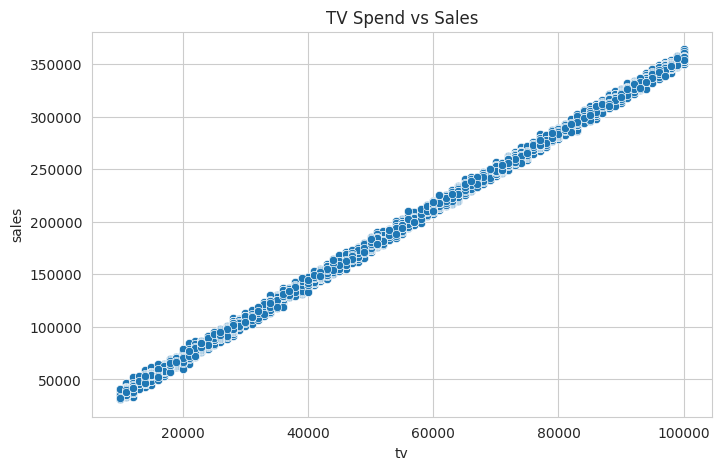

In [13]:
sns.scatterplot(x=df["tv"], y=df["sales"])
plt.title("TV Spend vs Sales")
plt.show()


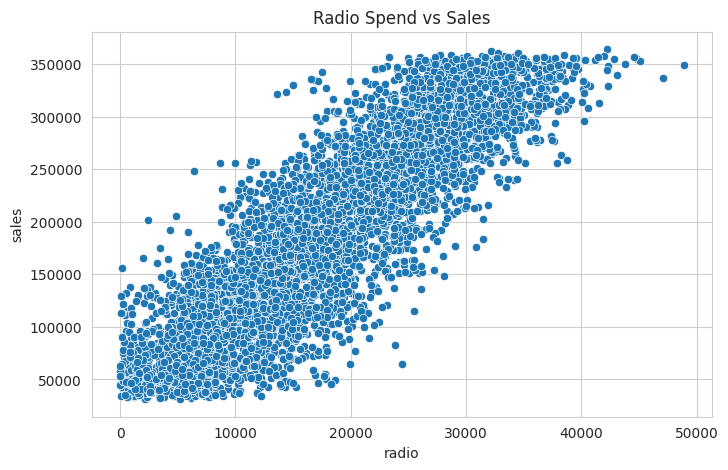

In [14]:
sns.scatterplot(x=df["radio"], y=df["sales"])
plt.title("Radio Spend vs Sales")
plt.show()


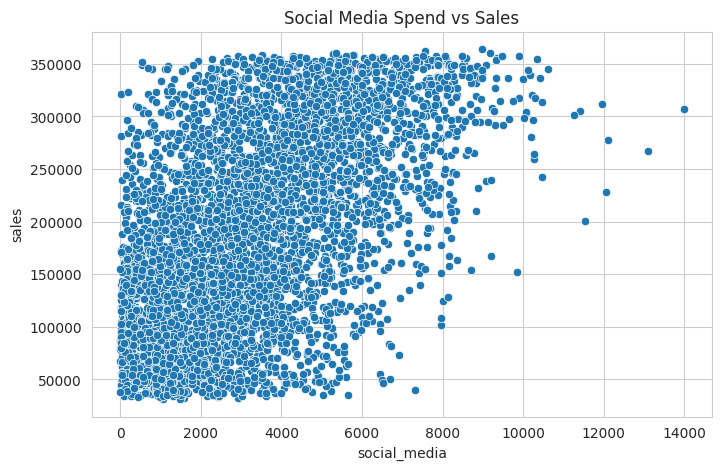

In [15]:
sns.scatterplot(x=df["social_media"], y=df["sales"])
plt.title("Social Media Spend vs Sales")
plt.show()


In [16]:
influencer_perf = df.groupby("influencer")[["Total_Spend", "sales", "ROI"]].mean().reset_index()
influencer_perf


,influencer,Total_Spend,sales,ROI
0,Macro,76834.368579,196066.150306,1.549624
1,Mega,74908.667387,190412.907830,1.543154
2,Micro,75304.177291,191578.370192,1.547419
3,Nano,75166.538607,191708.827019,1.549850


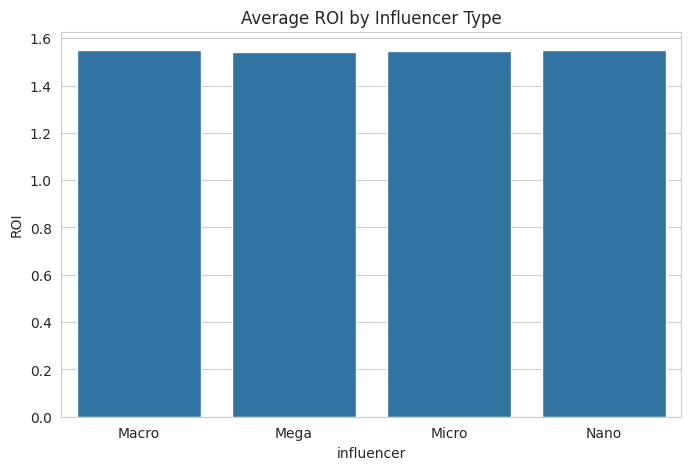

In [17]:
sns.barplot(data=influencer_perf, x="influencer", y="ROI")
plt.title("Average ROI by Influencer Type")
plt.show()


In [18]:
correlation = df[["tv", "radio", "social_media", "sales"]].corr()
correlation


,tv,radio,social_media,sales
tv,1.000000,0.869158,0.527687,0.999497
radio,0.869158,1.000000,0.606338,0.868638
social_media,0.527687,0.606338,1.000000,0.527446
sales,0.999497,0.868638,0.527446,1.000000


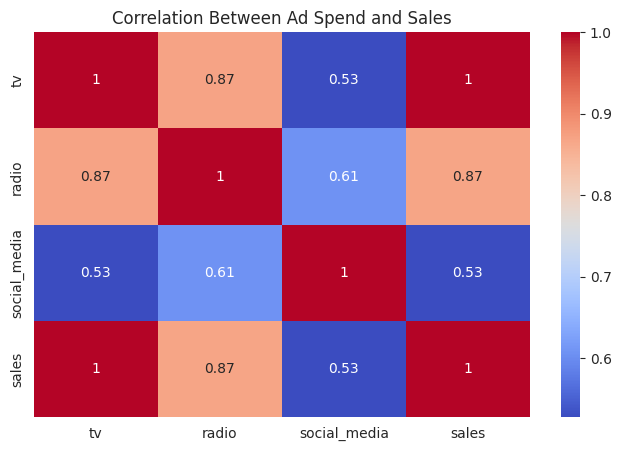

In [19]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Ad Spend and Sales")
plt.show()


In [20]:
top_campaigns = df.sort_values("ROI", ascending=False).head(5)
worst_campaigns = df.sort_values("ROI").head(5)

top_campaigns


,tv,radio,social_media,influencer,sales,Total_Spend,ROI
4534,14000.0,21.88,301.15,Micro,53702.02,14323.03,2.749348
1953,30000.0,179.66,280.33,Nano,113189.38,30459.99,2.716002
4018,10000.0,1294.19,128.50,Macro,41210.02,11422.69,2.607733
1772,17000.0,43.08,1299.32,Micro,64981.06,18342.40,2.542669
341,38000.0,857.28,218.74,Nano,137697.37,39076.02,2.523833


In [21]:
worst_campaigns


,tv,radio,social_media,influencer,sales,Total_Spend,ROI
1932,14000.0,18285.01,4157.36,Micro,46114.70,36442.37,0.265414
1248,15000.0,17878.53,6684.45,Macro,50735.60,39562.98,0.282401
63,14000.0,18649.44,4529.93,Mega,49815.67,37179.37,0.339874
1651,18000.0,24484.26,5258.96,Macro,64917.13,47743.22,0.359714
3078,10000.0,12201.23,2452.27,Macro,34113.96,24653.50,0.383737


In [ ]:
##### Key Insights
- TV and Social Media spend show the strongest impact on sales.
- Radio ads have moderate influence.
- Micro and Nano influencers deliver higher ROI than Mega influencers.
- Some high-spend campaigns generate lower ROI, indicating inefficient budget allocation.

### Recommendations
- Increase budget for high-ROI channels.
- Optimize influencer selection.
- Reallocate spend from low-performing campaigns.
